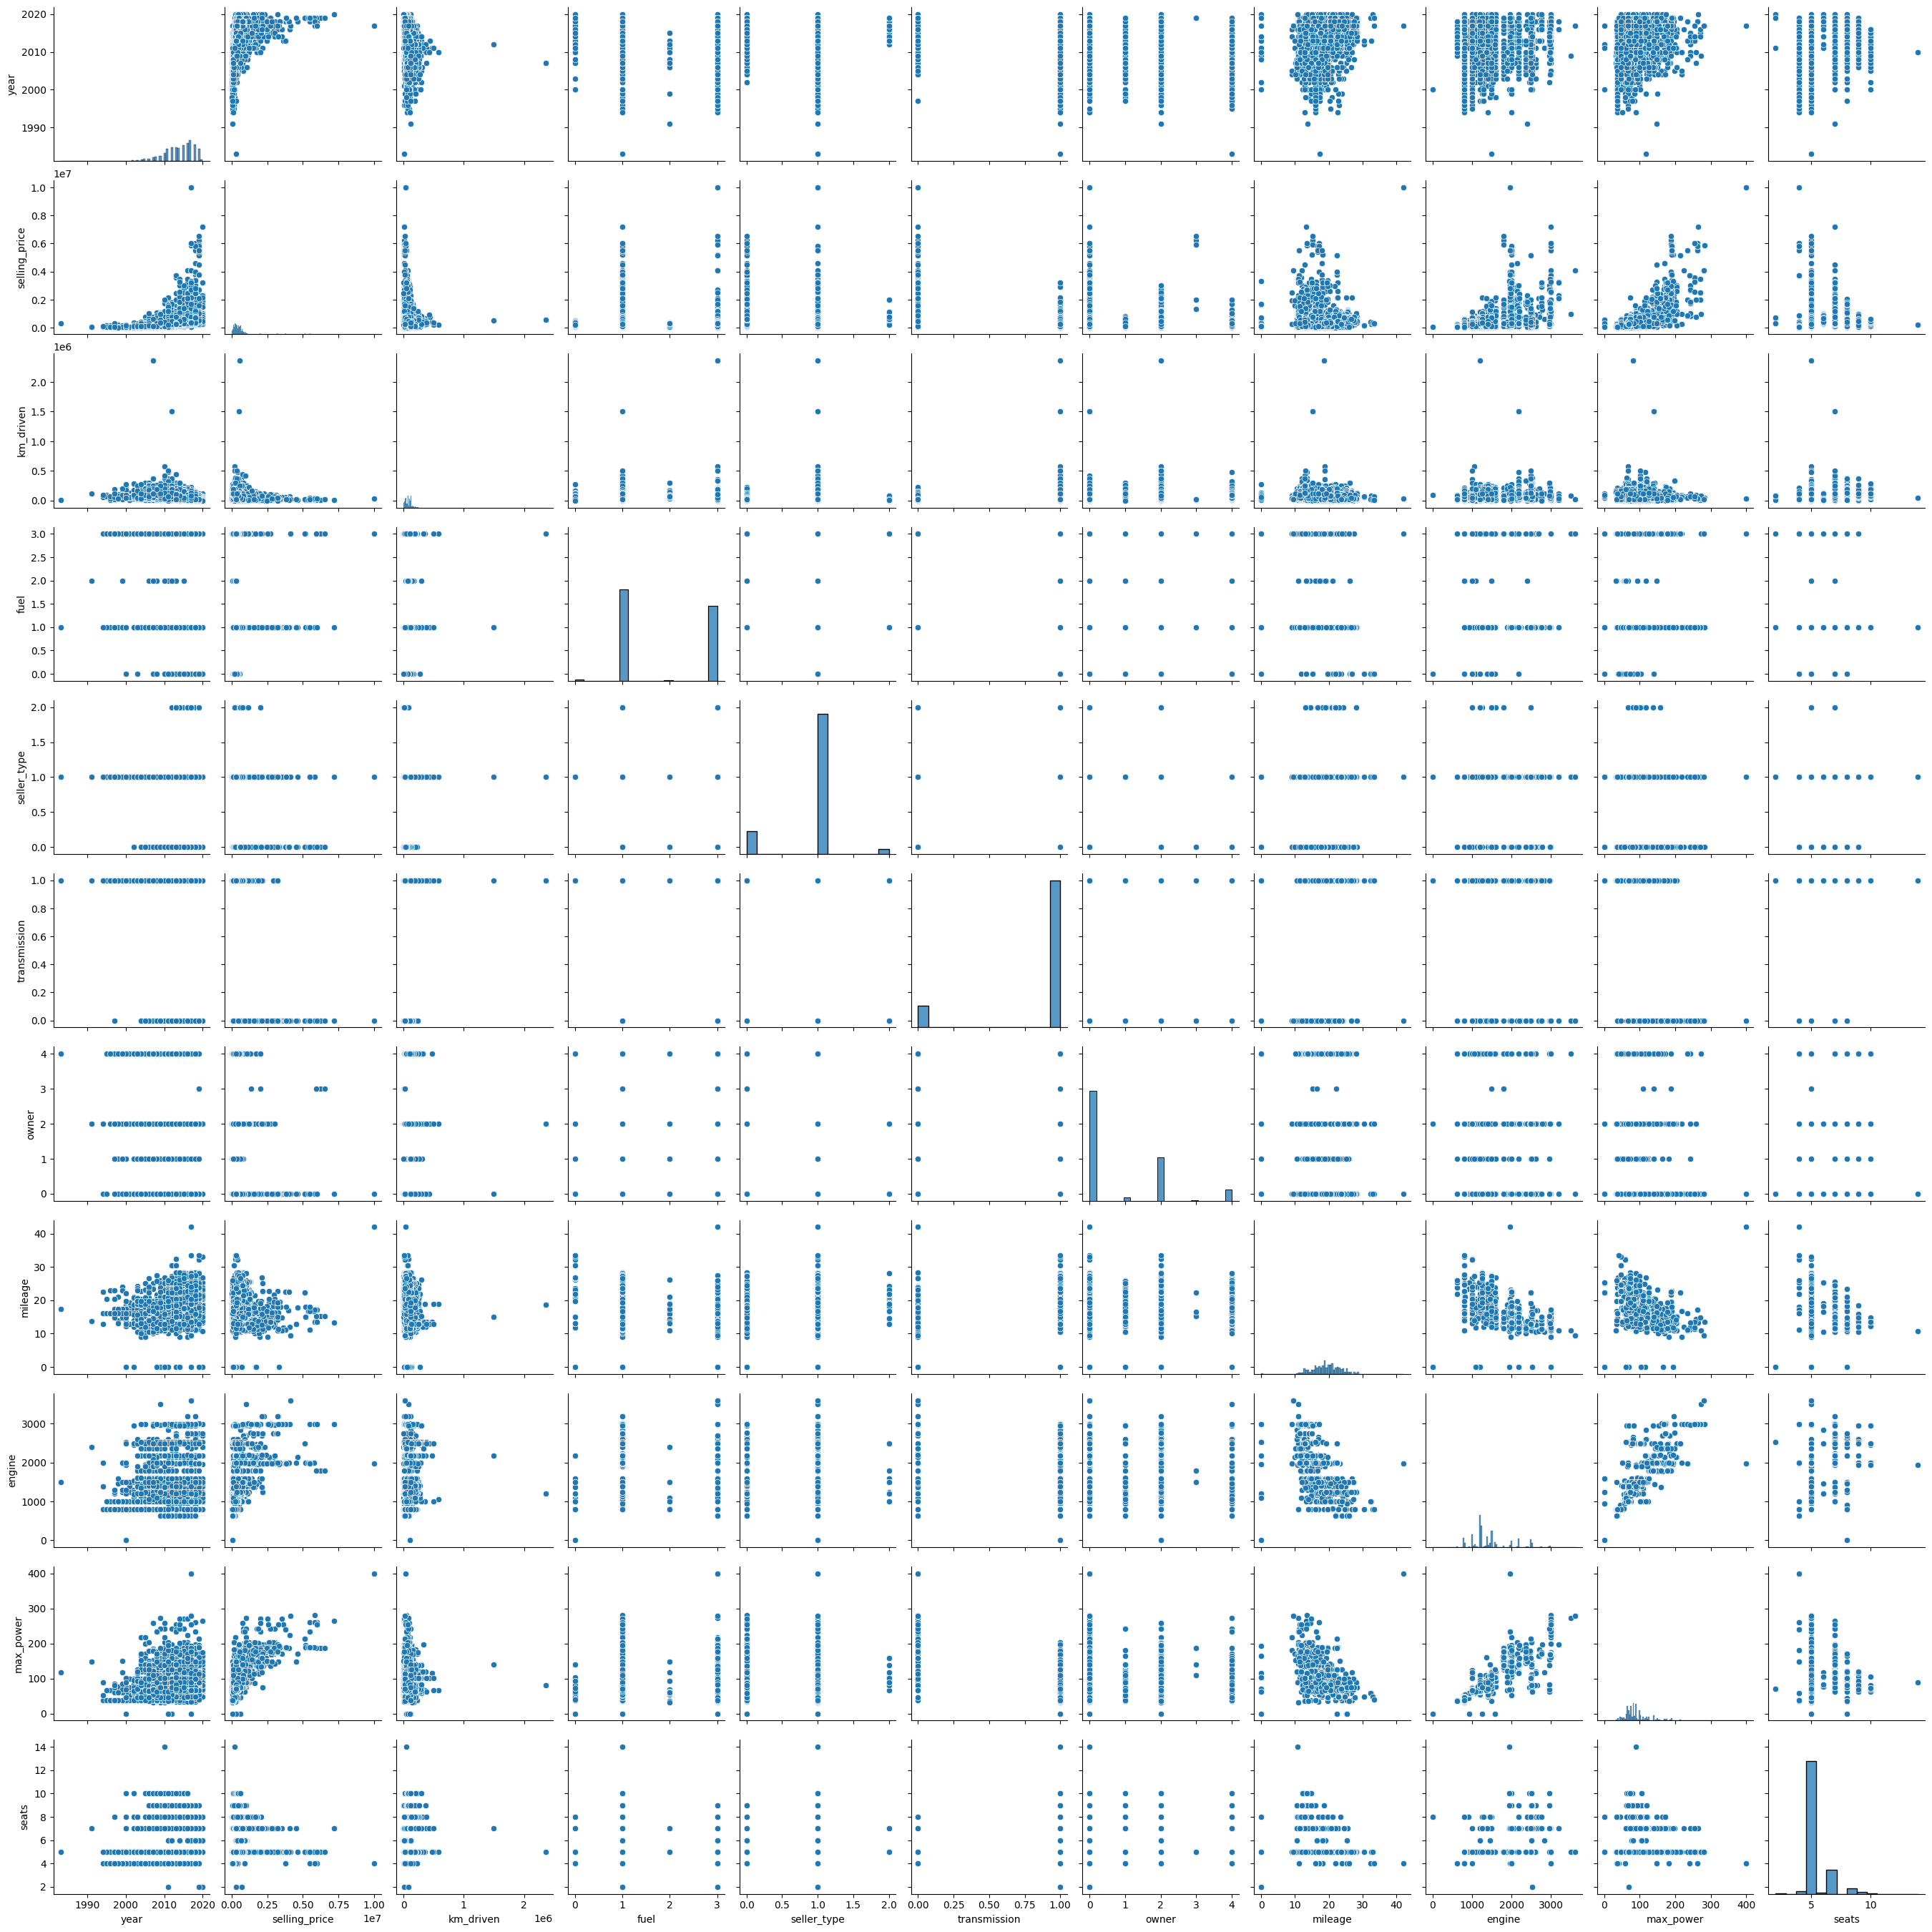

In [30]:
import pandas as pd 
from sklearn import preprocessing
import os 
from sklearn.linear_model import LinearRegression
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns


data_path  = 'Car details v3.csv'
car_data = pd.read_csv(data_path)
car_data = car_data.drop(['name', 'torque'], axis=1)

for i in range(len(car_data)):
    try:
        car_data.at[i, 'max_power'] = float(str(car_data.at[i, 'max_power']).split()[0])
        car_data.at[i, 'mileage'] = float(str(car_data.at[i, 'mileage']).split()[0])
        car_data.at[i, 'engine'] = float(str(car_data.at[i, 'engine']).split()[0])

    except:
        car_data.at[i, 'max_power'] = 0
        car_data.at[i, 'mileage'] = 0
        car_data.at[i, 'engine'] = 0

        
car_data.fillna(method ='ffill', inplace = True)
categorical_columns = ['fuel', 'seller_type', 'transmission', 'owner']

# car_data = pd.get_dummies(car_data, columns=categorical_columns, dtype=int)
# car_data = car_data.drop(categorical_columns, axis=1)

label_encoder = preprocessing.LabelEncoder()
for col in categorical_columns:
    car_data[col] = label_encoder.fit_transform(car_data[col])

car_data.head()
sns.pairplot(car_data)

In [31]:
numerical_cols = car_data.select_dtypes(include=['float64', 'int64']).columns
# numerical_cols = list(sorted(set(car_data.columns)-{'selling_price'}))
scaler = StandardScaler()
car_data[numerical_cols] = scaler.fit_transform(car_data[numerical_cols])
Y = car_data.loc[:, 'selling_price']
X = car_data.loc[:, list(sorted(set(car_data.columns)-{'selling_price'}))]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print(len(Y_test))

1626


R2 Score (MODEL): 0.67222151078084
R2 Score (METRICS OR TEST DATA): 0.6780550609398166
Intercept: 0.8610031651943814
MAE: 0.3380058565747423
MSE: 0.308345088694872
RMSE: 0.5552882933169688


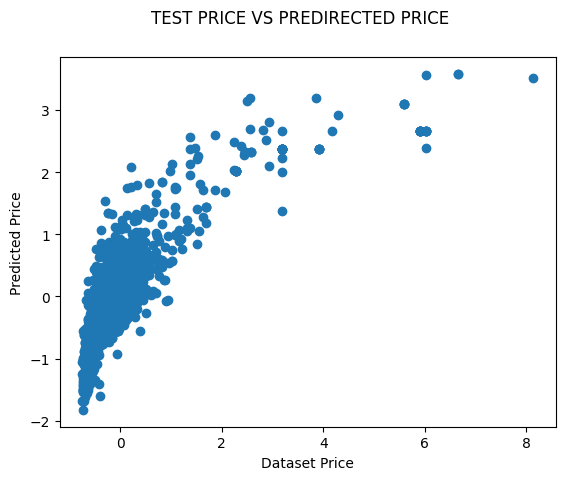

In [32]:

lr = LinearRegression()
lr.fit(X_train, Y_train)
price_predictions = lr.predict(X_test)

print(f"R2 Score (MODEL): {lr.score(X_train, Y_train)}")
print(f"R2 Score (METRICS OR TEST DATA): {metrics.r2_score(Y_test, price_predictions)}")
print(f"Intercept: {lr.intercept_}")


print('MAE:', metrics.mean_absolute_error(Y_test, price_predictions))
print('MSE:', metrics.mean_squared_error(Y_test, price_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, price_predictions)))

fig = plt.figure()
# Plot-label
fig.suptitle('TEST PRICE VS PREDIRECTED PRICE')

#X-label
plt.xlabel('Dataset Price')

# Y-label
plt.ylabel('Predicted Price')
plt.scatter(Y_test, price_predictions)

Cost is: 0.502946243320701
Cost is: 0.186664625763095
Cost is: 0.17936938577644734
Cost is: 0.17696042823246552
Cost is: 0.17535051315541786
Cost is: 0.17410620399063073
Cost is: 0.1730836736091448
Cost is: 0.1722139199678251
Cost is: 0.17145963953855323
Cost is: 0.1707984850047941
R2 Score (METRICS OR TEST DATA): 0.493400372887694


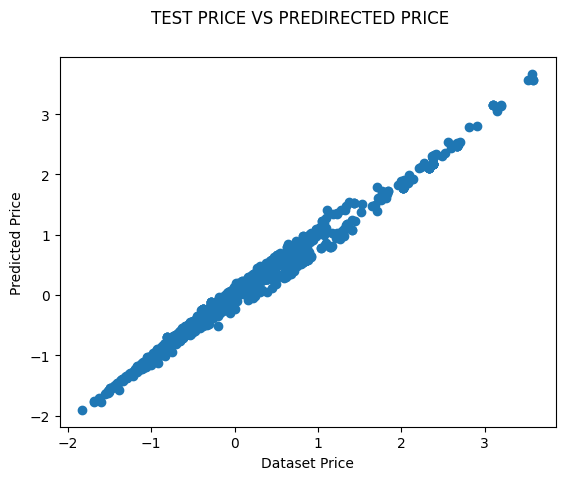

In [41]:
#https://www.ritchieng.com/multi-variable-linear-regression/#1a-multiple-features-variables
#https://faun.pub/implementing-multiple-linear-regression-from-scratch-in-python-f5d84d4935bb
def CostFunction(x,y,w,b):
    cost = np.sum((((x.dot(w) + b) - y) ** 2) / (2*len(y)))
    return cost

def GradientDescent(x, y, w, b, learning_rate, epochs):
    cost_list = [0] * epochs
  
    for epoch in range(epochs):
        z = x.dot(w) + b
        loss = z - y
        
        weight_gradient = x.T.dot(loss) / len(y)
        bias_gradient = np.sum(loss) / len(y)
        
        w = w - learning_rate*weight_gradient
        b = b - learning_rate*bias_gradient
  
        cost = CostFunction(x, y, w, b)
        cost_list[epoch] = cost
        
        if (epoch%(epochs/10)==0):
            print("Cost is:",cost)
        
    return w, b, cost_list

def predict(X, w, b):
    return X.dot(w) + b

def r2score(y_pred, y):
    rss = np.sum((y_pred - y) ** 2)
    tss = np.sum((y-y.mean()) ** 2)
    
    r2 = 1 - (rss / tss)
    return r2

w, b, c = GradientDescent(X_train, Y_train, np.zeros(X_train.shape[1]), 0, 0.002,epochs=10000)
# plt.plot(c)



y_pred = predict(X_test, w, b)
print(f"R2 Score (METRICS OR TEST DATA): {r2score(Y_test, y_pred)}")
fig = plt.figure()
# Plot-label
fig.suptitle('TEST PRICE VS PREDIRECTED PRICE')

#X-label
plt.xlabel('Dataset Price')

# Y-label
plt.ylabel('Predicted Price')
plt.scatter(price_predictions, y_pred)

In [42]:
print(f"R2 Score (METRICS OR TEST DATA): {metrics.r2_score(Y_test, y_pred)}")

R2 Score (METRICS OR TEST DATA): 0.6687704661815759
